In [10]:
import io
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import Image

import nltk as nltk
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import cmudict, stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.tag.stanford import StanfordNERTagger
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from gensim import models, corpora, similarities
import gensim as gensim
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim.models.coherencemodel import CoherenceModel

# import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
import sklearn as sklearn
from sklearn.decomposition import TruncatedSVD

import math 

import textstat
# from textblob import TextBlob, Word
# from textblob.wordnet import VERB, Synset

# import bokeh.plotting as bp
# from bokeh.plotting import save, show, reset_output
# from bokeh.models import HoverTool
# from bokeh.io import output_notebook

import textstat

import seaborn as sns

import numpy

import string
import spacy 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline

In [11]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('tokenize')
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
############ DOCUMENT ANALYSIS ON DOCUMENT LEVEL ##################

#################### IMPORTING FILE #########################
def analyzer(report):
    # Text processing read in entire file
    text = ''
    with open(report, "r") as file:
        for line in file.readlines():
            text += line

    # Remove hard newlines and split text on ends of sentences
    text = text.replace('\n', '').replace('\r', '')
    # textsplit is a list of all sentences without '.'
    textsplit = text.split('.')

    # make a list with all words in the text
    wordslist = []
    for x in textsplit:
        x = x.split(' ')
        for y in x:
            wordslist.append(y)

    ##########################################################
    ###################### PREPROCESSING #####################
    ##########################################################

    ############ TOKENIZATION ################################
    ##########################################################

    ############ words tokenized ##############################
    tokens = word_tokenize(text)        
    tokens = [w.lower() for w in tokens]

    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]             
    ############# sentences tokenized and sentences stop words removed ########
    tokenized_sentences = []
    stopwords_removed = []
    for i in textsplit:
        strips = i.strip(",.:;?!'`’")
        word = word_tokenize(strips)
        words = [x for x in word if x not in [',',"'",'.',';',':', '?','!','’','"', '`', '“', '”']]
        stop_remove = [word for word in words if word not in stopwords.words('english')]
        stop_remove_sent = ' '.join(stop_remove)
        sent = ' '.join(words)
        if len(sent) > 0:
            tokenized_sentences.append(sent)
            stopwords_removed.append(stop_remove_sent)

    ############ STOPWORD REMOVAL #############################
    ###########################################################

    ################## words without stopwords ################
    wordslistnoalpha = [word for word in stripped if word.isalpha()]
    # Make a list with all words without stopwords
    # how to remove "" 
    relevant_words = [word for word in wordslistnoalpha if word not in stopwords.words('english')]
    ################## READABILITY USING GUNNING FOG ##################################
    ###################################################################################

    ####################### Average sentence length ###################################
    av_sent_length = len(stripped) / len(textsplit)

    ############### percentage of difficult words (words >2 syllables) #################
    # Counts the number of syllables in a word
    def syllablesCount(word):                        
        count = 0
        vowels = 'aeiouy'
        word = word.lower().strip(".:;?!")
        if word[0] in vowels:
            count +=1
        for index in range(1,len(word)):
            if word[index] in vowels and word[index-1] not in vowels:
                count +=1
        if count == 0:
            count +=1
        return count

    # Counts the number of difficult words
    diff_words=0
    for i in relevant_words:
        if syllablesCount(i) > 2:
            diff_words +=1
    perc_diff_words = 100 * (diff_words / len(relevant_words))

    # Readability
    Readability = 0.4 * ((av_sent_length) + (perc_diff_words))
    
    ################### GENERAL ANALYTICS OF THE DOCUMENT ##################
    print("The document read in is:", report, "\n")
    print("Number of sentences in document:", len(textsplit))
    print("words in document:", len(stripped))
    print("The readability score for this documet equals", Readability)
    

    ####################### LSA ###########################################
    #######################################################################
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(stopwords_removed)
    print(x)
    lsa = TruncatedSVD(n_components=3, n_iter=15)
    lsa.fit(x)
    terms = vectorizer.get_feature_names()

    for i, comp in enumerate(lsa.components_):
        termsInComp = zip(terms,comp)
        sortedterms = sorted(termsInComp, key=lambda x: x[1], reverse=True)[:10]
        print("concept %d:" % i)
        for term in sortedterms:
            print(term[0])
            print(" ")   

    ########################### SENTIMENT ANALYSIS #####################
    ####################################################################
    # assesses the overall sentiment score considering the separate sentences
    sentiment = SentimentIntensityAnalyzer() 

    pos = 0
    neg = 0
    neu = 0
    overall_score = 0
    for i in textsplit:
        score = sentiment.polarity_scores(i)
        overall_score += score['compound']
        av_sentiment_sent = overall_score/len(textsplit)
        pos += score['pos']
        neu += score['neu']
        neg += score['neg']
        av_pos = pos / len(textsplit) * 100
        av_neu = neu / len(textsplit) * 100
        av_neg = neg / len(textsplit) * 100
    print(av_pos, '% of the document appears to be positive')
    print(av_neg, '% of the document appears to be negative')
    print(av_neu, '% of the document appears to be neutral')
    if av_sentiment_sent > 0.05:
        print('The overall text appears positive, with a compound score of', av_sentiment_sent)
    elif av_sentiment_sent < -0.05:
        print('The overall text appears negative, with a compound score of', av_sentiment_sent)
    else:
        print('The overall text appears neutral, with a compound score of', av_sentiment_sent)

    ###################### SENTIMENT VISUALISATION #####################################
    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [av_pos, av_neg, av_neu]
    colors = ['lightskyblue', 'lightcoral', 'gold']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

    ############################# NAMED ENTITY RECOGNITION #######################
    ##############################################################################
    num_ent = 0 #number of entities in the document
    doc_ent = [] # entities in the document
    doc = nlp(text)
    print(doc)
    num_ent += len(doc.ents)
    for x in doc.ents:
        doc_ent.append([x.text, x. label_])
    print("The entities in the document are", doc_ent) 
    sentences = [x for x in doc.sents]
    displacy.render(nlp(str(sentences)), jupyter=True, style='ent')
    print("There are", num_ent, "entities in this document")

The document read in is: C:\Users\drodill001\Documents\Google_annual_financial_report_2008.txt 

Number of sentences in document: 1150
words in document: 24285
The readability score for this documet equals 27.8100138465799
  (0, 3378)	0.2580919093303802
  (0, 33)	0.28176310045891473
  (0, 1710)	0.11283766668258323
  (0, 563)	0.28176310045891473
  (0, 368)	0.5048873285165644
  (0, 3128)	0.24746155901960193
  (0, 2166)	0.3110825366595472
  (0, 3581)	0.29393176593989084
  (0, 3869)	0.3110825366595472
  (0, 4144)	0.29393176593989084
  (0, 2202)	0.28176310045891473
  (1, 4144)	0.32020818439971555
  (1, 2488)	0.296669145210751
  (1, 1862)	0.3388921709216761
  (1, 4142)	0.2172834046155532
  (1, 2588)	0.21895923950229473
  (1, 2388)	0.3388921709216761
  (1, 1285)	0.2695837119510051
  (1, 1014)	0.296669145210751
  (1, 3917)	0.3388921709216761
  (1, 3292)	0.3069516849949262
  (1, 1068)	0.3388921709216761
  (2, 2588)	0.17007464479589926
  (2, 1285)	0.2093967541951876
  (2, 449)	0.1687729549300274

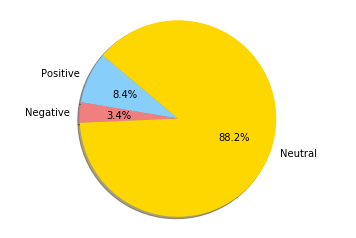

Since 2004, when Google began to have annual reports, Larryand I have taken turns writing an annual letter. I never imaginedI would be writing one in the midst of an economic crisis unlikeany we have seen in decades. As I write this, search queriesare reflecting economic hardship, the major market indexesare one-half of what they were less than 18 months ago, andunemployment is at record levels.Nonetheless, I am optimistic about the future, becauseI believe scarcity breeds clarity: it focuses minds, forcingpeople to think creatively and rise to the challenge.While much smaller in scale than today’s global collapse,the dot-com bust of 2000-2002 pushed Google andothers in the industry to make some tough decisions —and we all emerged stronger as a result.This new crisis punctuates the end of our fi rst decadeas a company, a decade that has brought great changeto Google, the web and the Internet as a whole. As I refl ecton this short time period, our accomplishments andour shortcomings, I 

The entities in the document are [['2004', 'DATE'], ['Google', 'ORG'], ['annual', 'DATE'], ['Larryand', 'ORG'], ['decades', 'DATE'], ['one-half', 'CARDINAL'], ['less than 18 months ago', 'DATE'], ['today', 'DATE'], ['2000-2002', 'DATE'], ['Google', 'ORG'], ['a decade', 'DATE'], ['Google', 'ORG'], ['the next10 years', 'DATE'], ['1990', 'DATE'], ['only 26', 'CARDINAL'], ['NCSAMosaic', 'PERSON'], ['1998', 'DATE'], ['tens of millions', 'CARDINAL'], ['Google', 'ORG'], ['Stanford', 'ORG'], ['Lego-like', 'ORG'], ['10,000,as', 'TIME'], ['hundreds', 'CARDINAL'], ['billions', 'CARDINAL'], ['Google', 'ORG'], ['Search', 'ORG'], ['Google', 'ORG'], ['our earliest days', 'DATE'], ['the years', 'DATE'], ['1998', 'DATE'], ['the past year', 'DATE'], ['359', 'CARDINAL'], ['the past decade', 'DATE'], ['today', 'DATE'], ['Google’s', 'ORG'], ['the coming decade', 'DATE'], ['Google', 'ORG'], ['today', 'DATE'], ['10 years ago', 'DATE'], ['Google', 'ORG'], ['the years', 'DATE'], ['Today', 'DATE'], ['Google Rea

There are 1041 entities in this document
   Number of Sentences  Number of Words  Readability  Sentiment Score  \
0                 1150            24285    27.810014         0.124793   

   Percentage Positive  Percentage Negative  Percentage Neutral  \
0             8.244174             3.275565           86.046087   

   Number of Named Entities  Number of Topics Extracted  
0                      1041                           5  


In [20]:
analyzer(r'C:\Users\drodill001\Documents\Google_annual_financial_report_2008.txt')